In [1]:
import numpy as np
import rescomp

import matplotlib.pyplot as plt

### Lorenz system:

In [2]:
# Lorenz system
def data_creation_function_Lorenz(time_steps, dt, starting_point=None):
    return  rescomp.simulate_trajectory(
            sys_flag='lorenz', dt=dt, time_steps=time_steps,
            starting_point=starting_point)

In [9]:
# Parameter ranges:
dts = [0.25, 0.1, 0.05, 0.01]
Ns = [100, 1000]
tau = 100
Ts = [0.1, 1, 10]
epss = [1e-8, 1e-6, 1e-3]
m = 3

starting_point = np.array([-14.03020521, -20.88693127, 25.53545])

lyapexp_array = np.zeros((len(dts), len(Ns), len(Ts), len(epss), m))

for i_dt, dt in enumerate(dts):
    print(f"dt: {dt}")
    def f(x):
        return data_creation_function_Lorenz(time_steps=2, dt=dt, starting_point=x)[-1]
    for i_N, N in enumerate(Ns):
        print(f"N: {N}")
        for i_T, T in enumerate(Ts):
            for i_eps, eps in enumerate(epss):
                lyapexp_array[i_dt, i_N, i_T, i_eps, :] = rescomp.measures.iterator_based_lyapunov_spectrum(f, starting_point, T=T, 
                                                                                           tau=tau,
                                                  eps=eps, nr_steps=N, dt=dt, return_convergence=False, nr_of_lyapunovs = m)
                


dt: 0.25
N: 100
N: 1000
dt: 0.1
N: 100
N: 1000
dt: 0.05
N: 100
N: 1000
dt: 0.01
N: 100
N: 1000


In [11]:
lyapexp_array.shape

(4, 2, 3, 3, 3)

In [24]:
x_axis_ticks = []
for i_dt, dt in enumerate(dts):
    for i_N, N in enumerate(Ns):
        for i_T, T in enumerate(Ts):
            for i_eps, eps in enumerate(epss):
                x_axis_ticks.append(f"dt({dt}), N({N}), T({T}), eps({eps})")

Text(0.5, 1.0, 'third lyapunov')

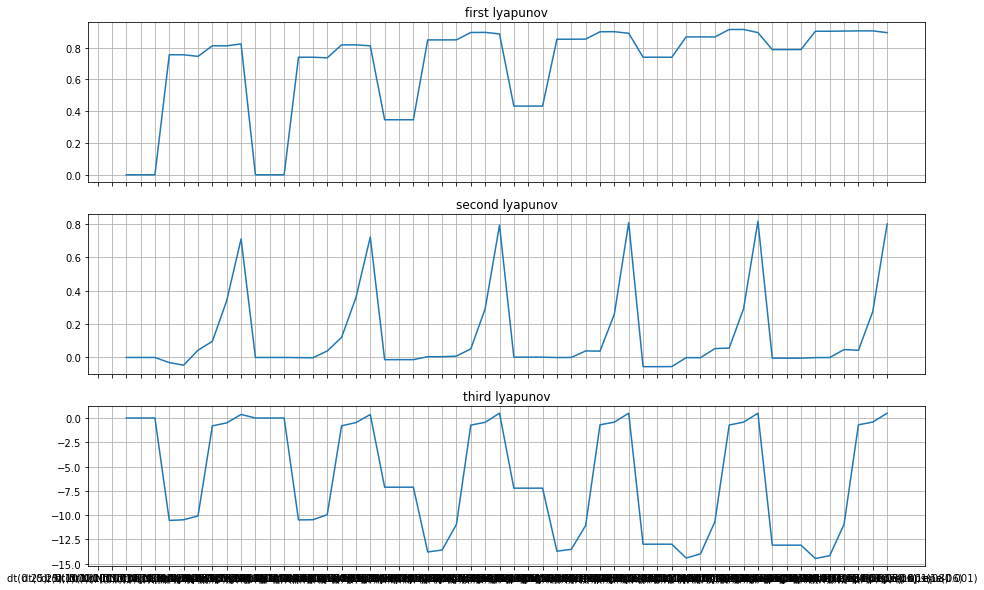

In [28]:
# data:
first = lyapexp_array[:, :, :, :, 0]
second = lyapexp_array[:, :, :, :, 1]
thrid = lyapexp_array[:, :, :, :, 2]

# plot:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15,10), sharex=True)

ax = axs[0]
ax.grid()
ax.plot(x_axis_ticks, first.flatten())
ax.set_title("first lyapunov")

ax = axs[1]
ax.grid()
ax.plot(second.flatten())
ax.set_title("second lyapunov")

ax = axs[2]
ax.grid()
ax.plot(thrid.flatten())
ax.set_title("third lyapunov")

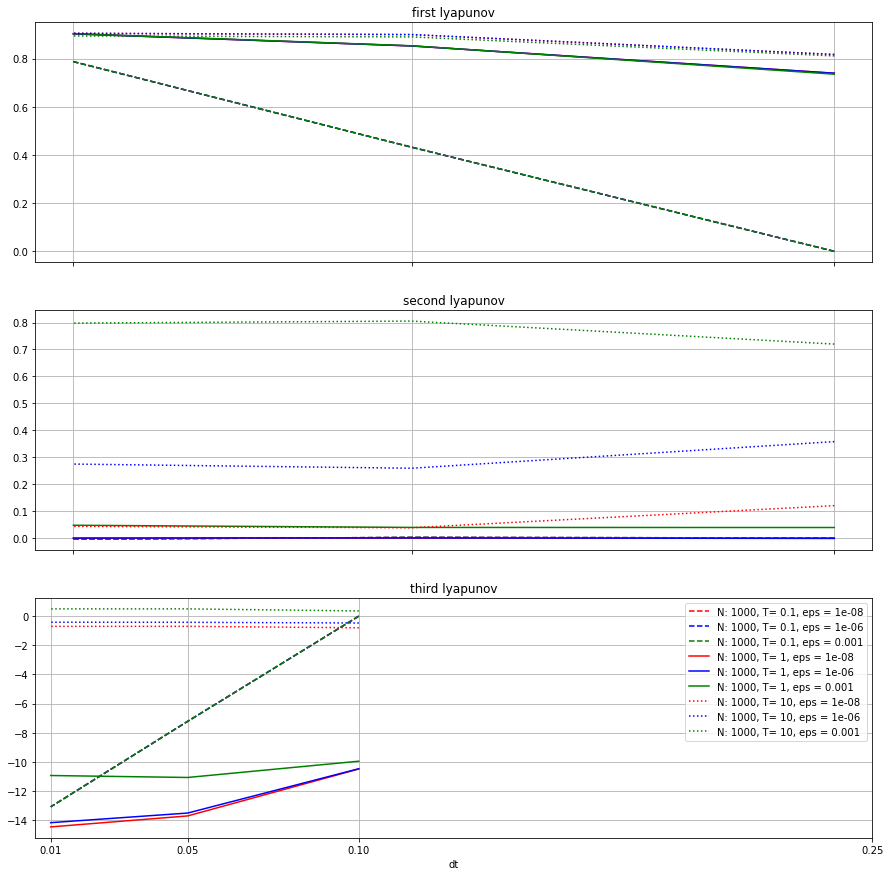

In [41]:
x_axis_ticks = dts

colors_eps = {0: "r", 1: "b", 2: "g"}
linestyles_T = {0: "--", 1: "-", 2: "dotted"}

# plot:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15,15), sharex=True)

ax = axs[0]
ax.grid()

for i_T, T in enumerate(Ts):
    for i_eps, eps in enumerate(epss):
        ax.plot(x_axis_ticks, lyapexp_array[:, -1, i_T, i_eps, 0], label=f"N: {N}, T= {T}, eps = {eps}",
                linestyle=linestyles_T[i_T], color=colors_eps[i_eps])
ax.set_title("first lyapunov")


ax = axs[1]
ax.grid()
for i_T, T in enumerate(Ts):
    for i_eps, eps in enumerate(epss):
        ax.plot(x_axis_ticks, lyapexp_array[:, -1, i_T, i_eps, 1], label=f"N: {N}, T= {T}, eps = {eps}",
                linestyle=linestyles_T[i_T], color=colors_eps[i_eps])
ax.set_title("second lyapunov")

ax = axs[2]
ax.grid()
for i_T, T in enumerate(Ts):
    for i_eps, eps in enumerate(epss):
        ax.plot(x_axis_ticks, lyapexp_array[:, -1, i_T, i_eps, 2], label=f"N: {N}, T= {T}, eps = {eps}",
                linestyle=linestyles_T[i_T], color=colors_eps[i_eps])
ax.set_title("third lyapunov")

ax.set_xticks(x_axis_ticks)
ax.set_xlabel("dt")

plt.legend(loc="best")

In [44]:
best = lyapexp_array[-2, -1, 1, 0, :]
print(best)

[ 8.52711382e-01 -4.64295557e-04 -1.37070692e+01]


In [12]:
starting_point = np.array([-14.03020521, -20.88693127, 25.53545])

f = lambda x: data_creation_function_Lorenz(time_steps=2, dt=dt, starting_point=x)[-1]


lyapunov_exp, lyapunov_exp_convergence = rescomp.measures.iterator_based_lyapunov_spectrum(f, starting_point, T=T, 
                                                                                           tau=tau,
                                                  eps=eps, nr_steps=N, dt=dt, return_convergence=True)

[ 8.52714912e-01  1.00140020e-04 -1.35103408e+01]
2.0631231338667466


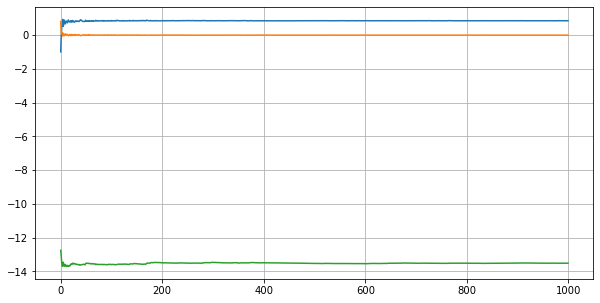

In [13]:
print(lyapunov_exp)
plt.figure(figsize=(10,5))
for iteration in lyapunov_exp_convergence.T:
    plt.plot(iteration)
plt.grid()

print(rescomp.measures.KY_dimension(lyapunov_exp))

### KS System:

In [ ]:
# KS system:
dimensions = 64
system_size = 36
def data_creation_function_KS(time_steps, dt, starting_point=None):
    sim_data = rescomp.simulate_trajectory(
            sys_flag='kuramoto_sivashinsky', dimensions=dimensions, system_size=system_size, dt=dt,
            time_steps=time_steps, starting_point = starting_point)
    return sim_data

In [ ]:
dt = 0.1
N = 100
tau = 10
T = 2
eps = 1e-6
m = 12

In [ ]:
starting_point = None
f = lambda x: data_creation_function_KS(time_steps=2, dt=dt, starting_point=x)[-1]


lyapunov_exp, lyapunov_exp_convergence = rescomp.measures.iterator_based_lyapunov_spectrum(f, starting_point, T=T, 
                                                                                           tau=tau,
                                                  eps=eps, nr_steps=N, dt=dt, return_convergence=True, nr_of_lyapunovs=m)

In [ ]:
print(lyapunov_exp)
plt.figure(figsize=(10,5))
for iteration in lyapunov_exp_convergence.T:
    plt.plot(iteration[20:])
plt.grid()

In [ ]:
for i, x in enumerate(lyapunov_exp):
    print(i+1, x.round(3))

In [ ]:
lyapunov_exponents = lyapunov_exp

lyapunov_sorted = np.sort(lyapunov_exponents)[::-1] # ascending order 
cumsum = lyapunov_sorted.cumsum()
j = np.where((cumsum>=0))[0].max() + 1 # +1 since index starts from 0

D_KY = j + cumsum[j-1]/np.abs(lyapunov_sorted[j])
print(D_KY)